In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../input/data-science-jobs-in-pakistan/indeed_jobs.csv')
df.shape

(927, 4)

In [3]:
df.head()

,job_title,job_company,job_location,job_summary
0,Information Management Assistant,United Nations Pakistan,Pakistan,Assist in data cleaning and analysis by ensuri...
1,Data Scientist,Teradata,Islamabad,Experience in data analysis is a plus.Strong h...
2,Data Analyst,"Aga Khan Health Service, Pakistan",Karachi,B.Sc. degree (or equivalent level of professio...
3,Data Processing Associate,GfK,Karachi,To suggest improvements in product data develo...
4,Front Line Manager,PepsiCo,Multan,Degree in either engineering or food science.E...


In [4]:
df.describe(include='all')

,job_title,job_company,job_location,job_summary
count,927,927,927,927
unique,661,423,27,746
top,iOS Developer,S&P Global,Karachi,Have experience with best-in-class client-side...
freq,21,27,301,26


In [5]:
df.isnull().sum()

job_title       0
job_company     0
job_location    0
job_summary     0
dtype: int64

In [6]:
df.dtypes

job_title       object
job_company     object
job_location    object
job_summary     object
dtype: object

In [7]:
df['job_location'].unique()

array(['Pakistan', 'Islamabad', 'Karachi', 'Multan', 'Lahore', 'Quetta',
       'Rawalpindi', 'Peshawar', 'Lahore+1 location', 'Hyderabad',
       'Sargodha', 'Lahore+2 locations', 'Sialkot', 'Khyber-Pakhtunkhwa',
       'Punjab', 'Mirpur Khas', 'Multan+16 locations', 'Faisalabad',
       'Islamabad+3 locations', 'Islamabad+1 location',
       'Rawalpindi+1 location', 'Multan+1 location', 'Abbottabad',
       'Mirpur', 'Larkana', 'Bahawalpur', 'Rawalpindi+2 locations'],
      dtype=object)

# EDA

## Cities with more jobs

In [8]:
location = df.groupby("job_location").count()
more_than_10_jobs = location.loc[location["job_title"] > 10]
more_than_10_jobs = more_than_10_jobs[["job_title"]]
more_than_10_jobs.rename(columns = {"Job Title":"Jobs"}, inplace = True)
more_than_10_jobs

,job_title
job_location,
Islamabad,241
Karachi,301
Lahore,251
Pakistan,45
Rawalpindi,35


In [9]:
location[["job_title"]].sort_values(by = "job_title", ascending = False)

,job_title
job_location,
Karachi,301
Lahore,251
Islamabad,241
Pakistan,45
Rawalpindi,35
Islamabad+1 location,9
Lahore+1 location,7
Faisalabad,6
Rawalpindi+1 location,4


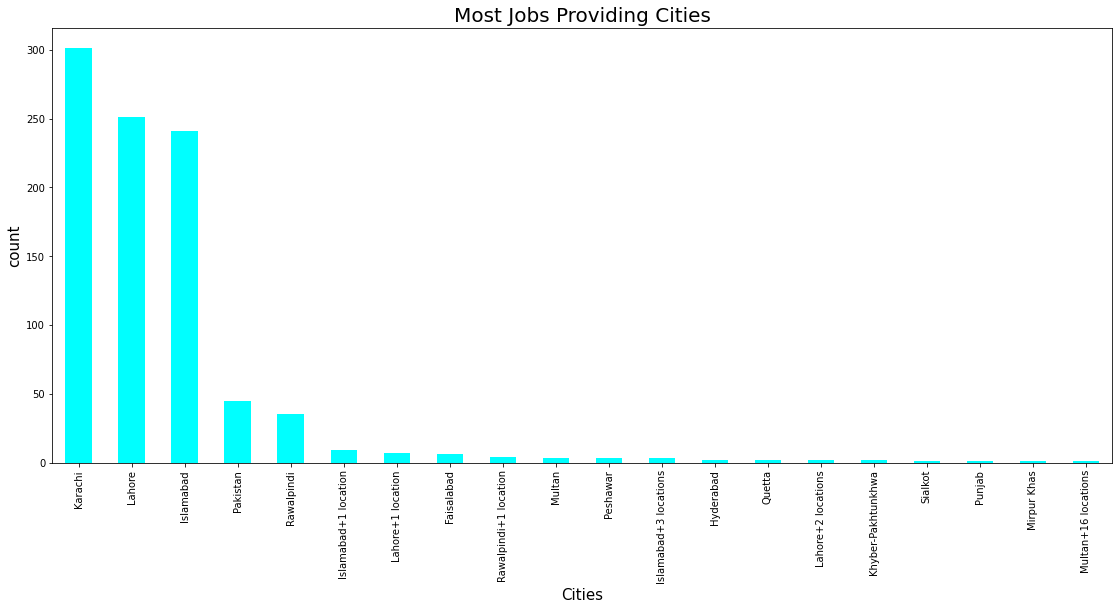

In [10]:
plt.rcParams['figure.figsize'] = (19, 8)
df['job_location'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = 'cyan')
plt.title("Most Jobs Providing Cities", fontsize = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Most demanding fields

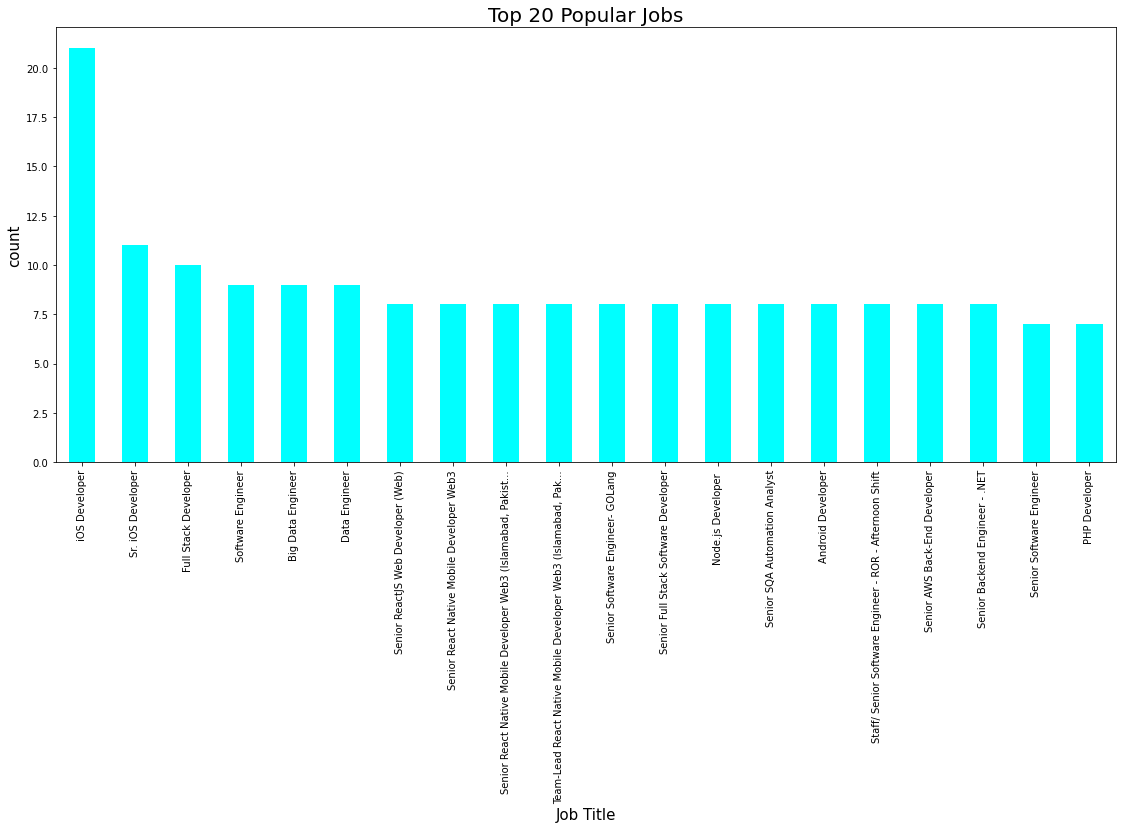

In [11]:
plt.rcParams['figure.figsize'] = (19, 8)
df['job_title'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = 'cyan')
plt.title("Top 20 Popular Jobs", fontsize = 20)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Top Recruiting Companies

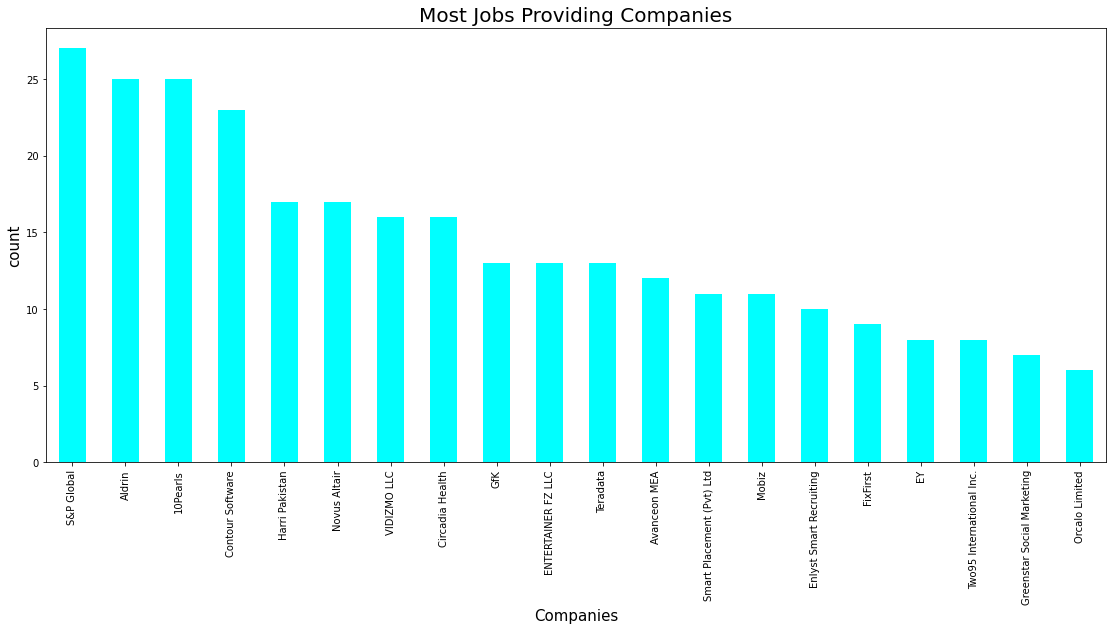

In [12]:
plt.rcParams['figure.figsize'] = (19, 8)
df['job_company'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = 'cyan')
plt.title("Most Jobs Providing Companies", fontsize = 20)
plt.xlabel('Companies', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Word Clouds

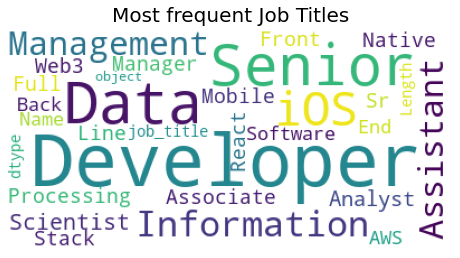

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['job_title']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most frequent Job Titles', fontsize = 20)
plt.show()

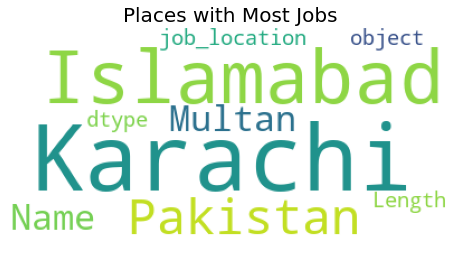

In [14]:
wordcloud = WordCloud(background_color = 'white').generate(str(df['job_location']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (8, 8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Places with Most Jobs', fontsize = 20)
plt.show()

# Model Development

In [15]:
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

In [17]:
#lowercase
df["Text_1"] = df.job_summary.str.lower()
#remove \n
df["Text_2"] = df.Text_1.str.replace("\\n", " ")
#remove punctuation and tokenize
df["Tokens"] = df.apply(lambda row: tokenizer.tokenize(row['Text_2']), axis=1)
#remove stopwords
df['Tokens_1'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])
#merge tokens back into string text
df['Text_3']=[" ".join(txt) for txt in df["Tokens_1"].values]
#create bigrams
df["Tokens_2"] = df["Tokens_1"].apply(lambda row: list(ngrams(row, 2)))
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,job_title,job_company,job_location,job_summary,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2
0,Information Management Assistant,United Nations Pakistan,Pakistan,Assist in data cleaning and analysis by ensuri...,assist in data cleaning and analysis by ensuri...,assist in data cleaning and analysis by ensuri...,"[assist, in, data, cleaning, and, analysis, by...","[assist, data, cleaning, analysis, ensuring, d...",assist data cleaning analysis ensuring data co...,"[(assist, data), (data, cleaning), (cleaning, ..."
1,Data Scientist,Teradata,Islamabad,Experience in data analysis is a plus.Strong h...,experience in data analysis is a plus.strong h...,experience in data analysis is a plus.strong h...,"[experience, in, data, analysis, is, a, plus, ...","[experience, data, analysis, plus, strong, han...",experience data analysis plus strong hands dat...,"[(experience, data), (data, analysis), (analys..."
2,Data Analyst,"Aga Khan Health Service, Pakistan",Karachi,B.Sc. degree (or equivalent level of professio...,b.sc. degree (or equivalent level of professio...,b.sc. degree (or equivalent level of professio...,"[b, sc, degree, or, equivalent, level, of, pro...","[b, sc, degree, equivalent, level, professiona...",b sc degree equivalent level professional expe...,"[(b, sc), (sc, degree), (degree, equivalent), ..."
3,Data Processing Associate,GfK,Karachi,To suggest improvements in product data develo...,to suggest improvements in product data develo...,to suggest improvements in product data develo...,"[to, suggest, improvements, in, product, data,...","[suggest, improvements, product, data, develop...",suggest improvements product data development ...,"[(suggest, improvements), (improvements, produ..."
4,Front Line Manager,PepsiCo,Multan,Degree in either engineering or food science.E...,degree in either engineering or food science.e...,degree in either engineering or food science.e...,"[degree, in, either, engineering, or, food, sc...","[degree, either, engineering, food, science, e...",degree either engineering food science ensures...,"[(degree, either), (either, engineering), (eng..."


In [18]:
encoder = LabelEncoder()
y = encoder.fit_transform(df.job_title)
y

array([231, 135, 119, 133, 183, 117, 126,  83, 119, 123, 372, 231, 582,
       396, 120, 150, 548,  80, 216, 398, 102, 155, 609, 455, 452, 371,
       376,  79, 573, 223, 305,  42,   9, 178, 126, 453,  44, 387, 122,
       476, 428, 370, 450, 251,  18, 108, 516, 263, 112, 554, 143, 612,
        36, 138, 168, 375, 138, 366, 408,  39, 554, 444, 454, 310, 297,
        71, 332, 420, 174, 554, 299, 447, 126, 282,  82, 206, 473, 398,
       295, 335, 459, 311, 356, 440, 640, 163, 578, 239,  29, 407, 142,
       404,  79,  47,  62,  25, 524, 561,  99,  60, 355,  37, 572, 509,
       585, 172, 103, 513, 434, 106, 281, 215, 623, 102, 503,  88, 288,
       611, 577, 271, 414, 474, 479, 328, 637,   6, 286, 366, 363, 352,
       463, 516, 292, 626, 554,  31, 205, 333, 156,  35,  67, 365, 653,
       517, 107, 255,  50, 254, 203, 520,  85, 510, 198, 481,  91, 114,
       655,  26, 110, 148, 539,  15, 113, 126, 506, 314, 353, 119,  40,
       610, 101, 553, 659, 464, 388, 272, 188,  94, 554, 169, 14

In [19]:
v = TfidfVectorizer(max_features=100)
x = df["Text_3"]
v.fit(x)
v2={}
for a, b in v.vocabulary_.items():
    v2[b] = a

In [20]:
print(v2.get(71))

similar


In [21]:
x_tfidf = v.transform(x)

In [22]:
print(x_tfidf)

  (0, 20)	0.7057889760945627
  (0, 3)	0.7084221349050217
  (1, 80)	0.4537622070523447
  (1, 72)	0.4861032495232101
  (1, 33)	0.28511978495544715
  (1, 25)	0.43434822345308205
  (1, 20)	0.29683963668333735
  (1, 3)	0.44692062981896047
  (2, 66)	0.5076588462682726
  (2, 33)	0.5466891414786834
  (2, 23)	0.6020194956135999
  (2, 20)	0.2845804021643319
  (3, 75)	0.4736077439561708
  (3, 66)	0.28468745291271313
  (3, 56)	0.4781933203929278
  (3, 27)	0.4126409233456519
  (3, 20)	0.31917682686544185
  (3, 13)	0.44026529379791024
  (4, 66)	0.34222425892826935
  (4, 30)	0.5028033297058242
  (4, 23)	0.4058348973157858
  (4, 21)	0.6546495471544623
  (4, 20)	0.19184205683028988
  (5, 56)	0.25889472287360576
  (5, 48)	0.24219138370824322
  :	:
  (923, 14)	0.31967460897957584
  (923, 9)	0.2882230479777245
  (923, 4)	0.32478991737807655
  (924, 97)	0.2937090107736446
  (924, 65)	0.35241014340239923
  (924, 63)	0.397120432116544
  (924, 57)	0.3769437243468932
  (924, 56)	0.3380883896785395
  (924, 43)	

In [23]:
s = svm.LinearSVC(C=1.0)
s.fit(x_tfidf, y)
s_pred = s.predict(x_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(s_pred, y)*100)

SVM Accuracy Score ->  84.57389428263214


In [24]:
s.coef_[0]

array([-1.52291795e-01, -2.41832408e-02, -8.76002363e-02,  1.87517588e-01,
        0.00000000e+00, -1.46176833e-02, -8.47112296e-03, -1.72616783e-02,
       -7.42164355e-03,  0.00000000e+00,  6.93889390e-18,  0.00000000e+00,
       -1.20430587e-02, -6.01857106e-02,  4.33680869e-19, -2.02668123e-03,
       -1.71151077e-02,  2.53976166e-01, -5.83955374e-02,  2.79496600e-01,
       -1.83569151e-01, -1.33745408e-02, -4.33680869e-19, -9.55886268e-03,
       -3.36264407e-02, -1.43459478e-02,  3.68628739e-18, -5.34877408e-02,
       -1.63199912e-02, -9.13331745e-02, -2.01265153e-02, -7.30096386e-04,
        0.00000000e+00, -1.12900570e-01, -2.91578245e-03, -1.26020985e-02,
       -3.43347710e-02,  0.00000000e+00, -1.94767733e-02, -3.71520992e-02,
       -6.98781555e-03, -7.13089040e-03, -4.53251631e-02, -4.09366288e-02,
       -4.55096328e-02, -6.35371198e-02, -1.32204046e-02, -4.55044340e-02,
       -2.27045490e-02, -1.73472348e-18, -1.04256350e-02, -1.95635914e-02,
       -3.31375059e-02, -

In [25]:
df["SVM_Prediction"] = s_pred

In [26]:
df.head()

,job_title,job_company,job_location,job_summary,Text_1,Text_2,Tokens,Tokens_1,Text_3,Tokens_2,SVM_Prediction
0,Information Management Assistant,United Nations Pakistan,Pakistan,Assist in data cleaning and analysis by ensuri...,assist in data cleaning and analysis by ensuri...,assist in data cleaning and analysis by ensuri...,"[assist, in, data, cleaning, and, analysis, by...","[assist, data, cleaning, analysis, ensuring, d...",assist data cleaning analysis ensuring data co...,"[(assist, data), (data, cleaning), (cleaning, ...",231
1,Data Scientist,Teradata,Islamabad,Experience in data analysis is a plus.Strong h...,experience in data analysis is a plus.strong h...,experience in data analysis is a plus.strong h...,"[experience, in, data, analysis, is, a, plus, ...","[experience, data, analysis, plus, strong, han...",experience data analysis plus strong hands dat...,"[(experience, data), (data, analysis), (analys...",135
2,Data Analyst,"Aga Khan Health Service, Pakistan",Karachi,B.Sc. degree (or equivalent level of professio...,b.sc. degree (or equivalent level of professio...,b.sc. degree (or equivalent level of professio...,"[b, sc, degree, or, equivalent, level, of, pro...","[b, sc, degree, equivalent, level, professiona...",b sc degree equivalent level professional expe...,"[(b, sc), (sc, degree), (degree, equivalent), ...",119
3,Data Processing Associate,GfK,Karachi,To suggest improvements in product data develo...,to suggest improvements in product data develo...,to suggest improvements in product data develo...,"[to, suggest, improvements, in, product, data,...","[suggest, improvements, product, data, develop...",suggest improvements product data development ...,"[(suggest, improvements), (improvements, produ...",133
4,Front Line Manager,PepsiCo,Multan,Degree in either engineering or food science.E...,degree in either engineering or food science.e...,degree in either engineering or food science.e...,"[degree, in, either, engineering, or, food, sc...","[degree, either, engineering, food, science, e...",degree either engineering food science ensures...,"[(degree, either), (either, engineering), (eng...",183


In [27]:
confusion_matrix(s_pred, y)
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])